Understand patterns like:

Most used words

Transcript length per comedian

Word cloud per comedian

Word frequency bar chart



In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from collections import Counter


In [17]:
import pandas as pd

df = pd.read_csv("cleaned_transcripts.csv")


import ast
df['tokens'] = df['tokens'].apply(ast.literal_eval)


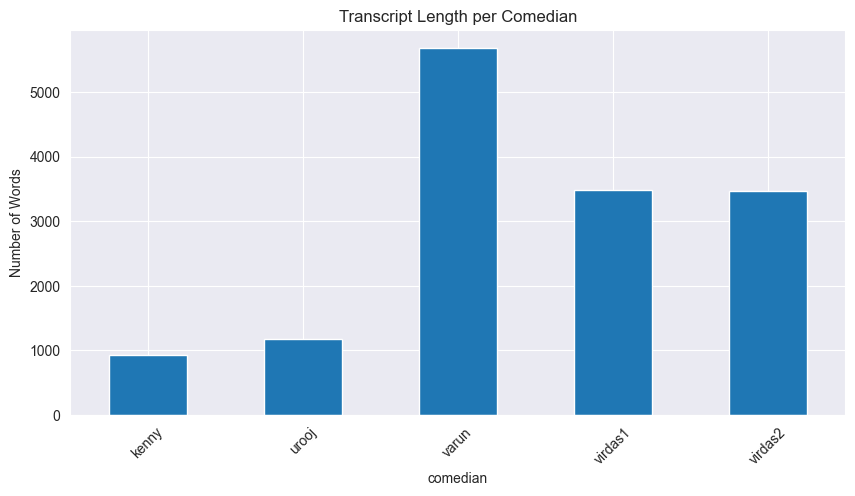

In [18]:
df['word_count'] = df['tokens'].apply(len)

df.plot(x='comedian', y='word_count', kind='bar', figsize=(10, 5), legend=False)
plt.ylabel("Number of Words")
plt.title("Transcript Length per Comedian")
plt.xticks(rotation=45)
plt.show()


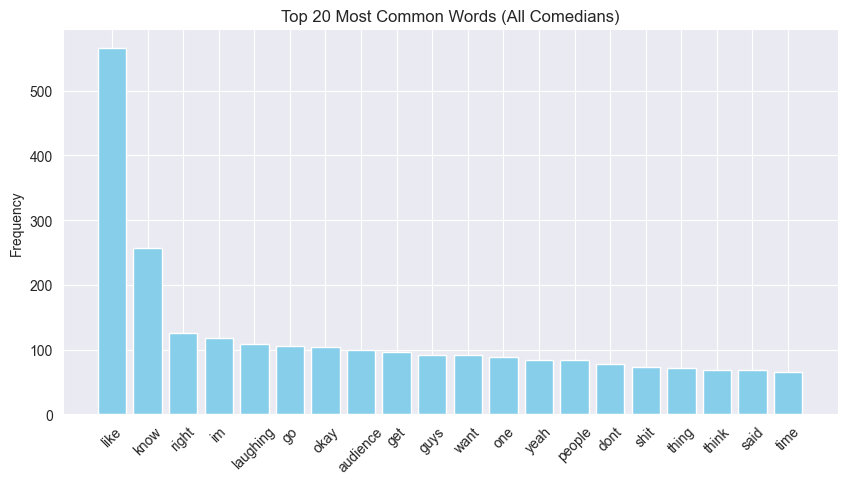

In [19]:
all_tokens = []
for token_list in df['tokens']:
    all_tokens.extend(token_list)

top_words = Counter(all_tokens).most_common(20)

words, counts = zip(*top_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.title("Top 20 Most Common Words (All Comedians)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()


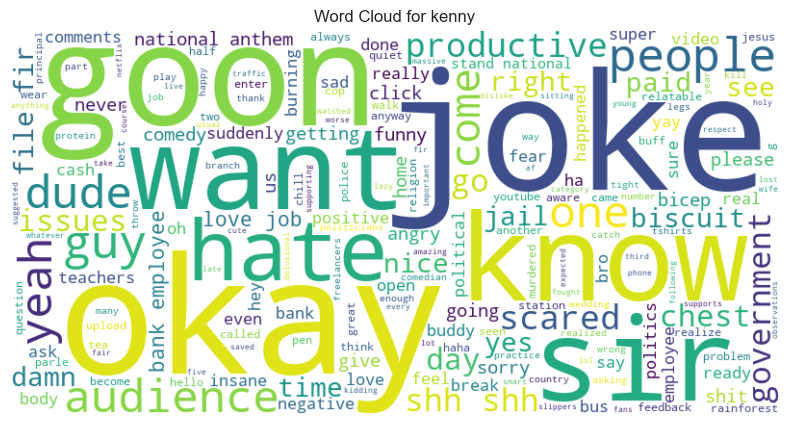

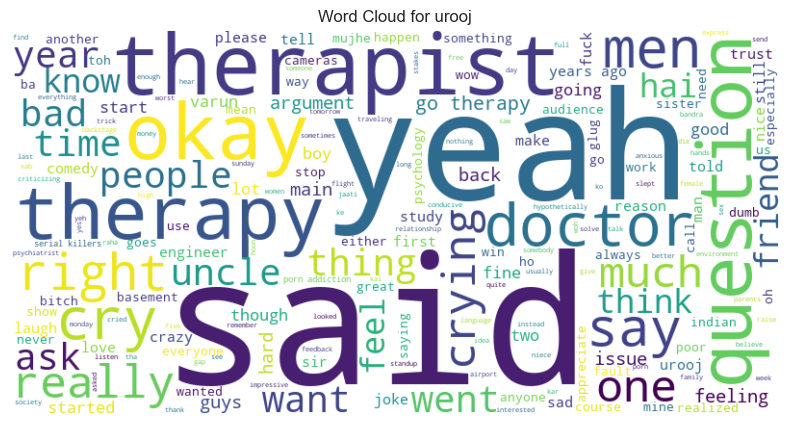

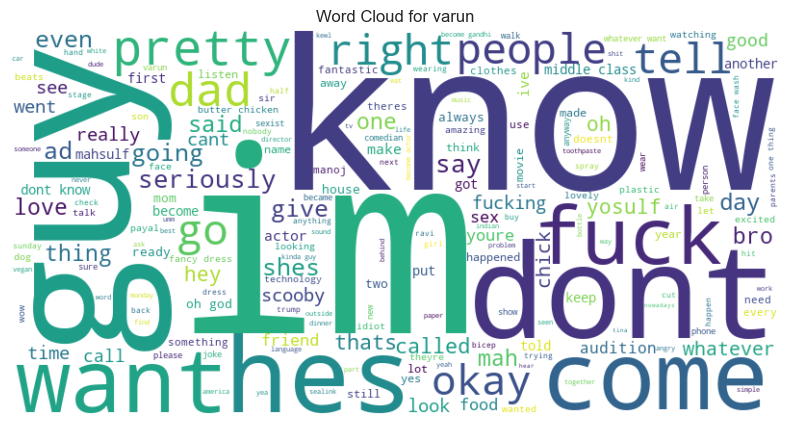

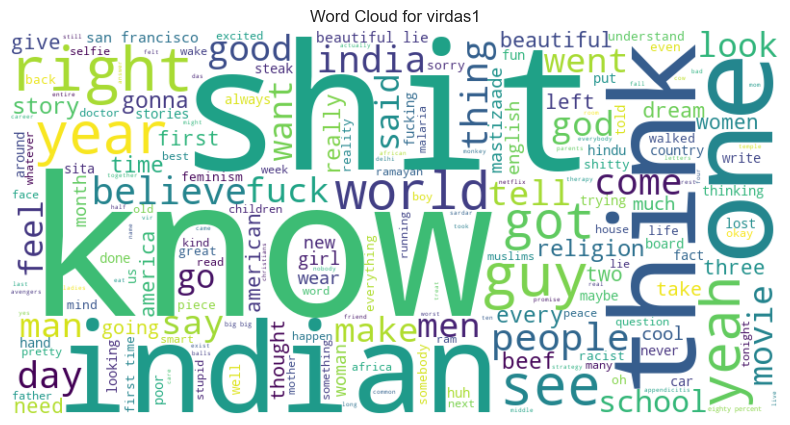

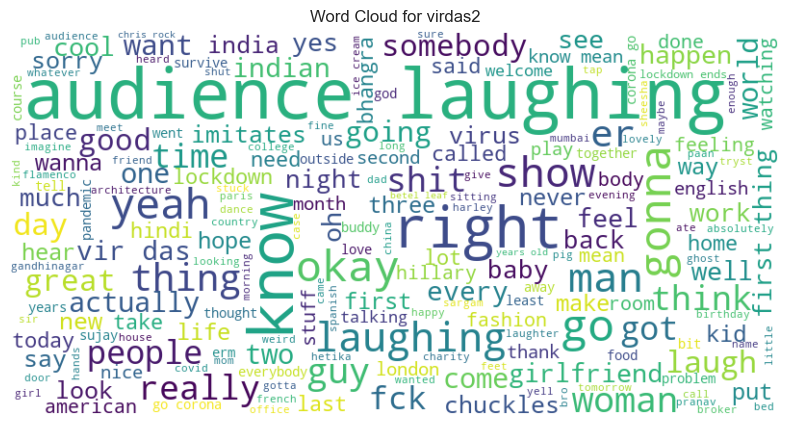

In [20]:
for comedian in df['comedian'].unique():

    text = " ".join(df[df['comedian'] == comedian]['cleaned_text'])

    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {comedian}")
    plt.show()


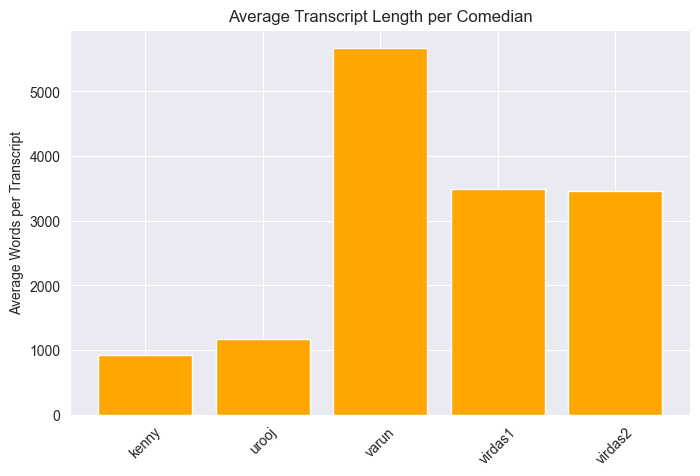

In [21]:
avg_words = df.groupby('comedian')['word_count'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(avg_words['comedian'], avg_words['word_count'], color='orange')
plt.ylabel("Average Words per Transcript")
plt.title("Average Transcript Length per Comedian")
plt.xticks(rotation=45)
plt.show()


In [22]:
comedian_words = {}

for comedian in df['comedian'].unique():
    tokens = []
    for token_list in df[df['comedian'] == comedian]['tokens']:
        tokens.extend(token_list)
    comedian_words[comedian] = set(tokens)

for comedian in comedian_words:
    others = set().union(*(comedian_words[c] for c in comedian_words if c != comedian))
    unique_words = comedian_words[comedian] - others
    print(f"\nTop unique words used by {comedian}:\n", list(unique_words)[:15])



Top unique words used by kenny:
 ['burning', 'democracy', 'coffee', 'saved', 'closing', 'overtake', 'rare', 'killed', 'bag', 'supports', 'releases', 'file', 'fans', 'comments', 'per']

Top unique words used by urooj:
 ['imagination', 'agreed', 'ewww', 'classics', 'paise', 'jaate', 'oooo', 'professor', 'hypothetically', 'expensive', 'argue', 'row', 'addicted', 'attacks', 'gaps']

Top unique words used by varun:
 ['everytime', 'chemical', 'reaction', 'prash', 'keeps', 'raging', 'save', 'cid', 'thursday', 'persons', 'gibberish', 'absorbing', 'antidarkening', 'whats', 'competition']

Top unique words used by virdas1:
 ['uncool', 'deliver', 'supporters', 'wildlife', 'wheels', 'ounces', 'assholes', 'enrolling', 'unpatriotic', 'fries', 'saving', 'block', 'chairs', 'masturbated', 'sentimental']

Top unique words used by virdas2:
 ['bike', 'featured', 'lit', 'uae', 'admin', 'balconies', 'whose', 'circumstances', 'jerry', 'page', 'fold', 'confidence', 'q', 'perfect', 'department']
